### Volatility, Simple & Exponential Moving Average for NFLX

In [1]:
# dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# import NFLX Data

file = pd.read_csv("NFLX_updated.csv", index_col = 0, parse_dates=True)
df = pd.DataFrame(file)

In [5]:
df = df.drop(["Daily_Pct_Change"], axis=1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Change,Normalized_Change
Date,,,,,,,,
2020-05-26,427.77,428.50,413.14,414.77,414.77,7881100,-13.00,1.00
2020-05-27,410.38,420.02,397.86,419.89,419.89,10446300,9.51,1.01
2020-05-28,417.24,422.37,411.50,413.44,413.44,5655100,-3.80,1.00
2020-05-29,417.46,420.30,411.85,419.73,419.73,5254900,2.27,1.01
2020-06-01,418.83,426.72,415.98,425.92,425.92,3743700,7.09,1.03


In [6]:
df["Daily_Percent_Change"] = df["Close"].pct_change()
df.head(5)

,Open,High,Low,Close,Adj Close,Volume,Daily_Change,Normalized_Change,Daily_Percent_Change
Date,,,,,,,,,
2020-05-26,427.77,428.50,413.14,414.77,414.77,7881100,-13.00,1.00,NaN
2020-05-27,410.38,420.02,397.86,419.89,419.89,10446300,9.51,1.01,0.012344
2020-05-28,417.24,422.37,411.50,413.44,413.44,5655100,-3.80,1.00,-0.015361
2020-05-29,417.46,420.30,411.85,419.73,419.73,5254900,2.27,1.01,0.015214
2020-06-01,418.83,426.72,415.98,425.92,425.92,3743700,7.09,1.03,0.014748


In [7]:
# Getting Log Returns using numpy

df["Log_Returns"] = np.log(df["Close"]/df["Close"].shift())

In [8]:
# Standard dev of Log_Returns
df["Log_Returns"].std()

0.02632245675324348

In [10]:
# 252 trading days a year - calculating volatility 
volatility = df["Log_Returns"].std()*252**.5
volatility

0.41785604679200955

In [12]:
# put volatility into a string value

str_vol = str(round(volatility,5)*100)
print("The volatility is :", str_vol)

The volatility is : 41.786


#### Graph the Volatility w/ a Histogram

<IPython.core.display.Javascript object>


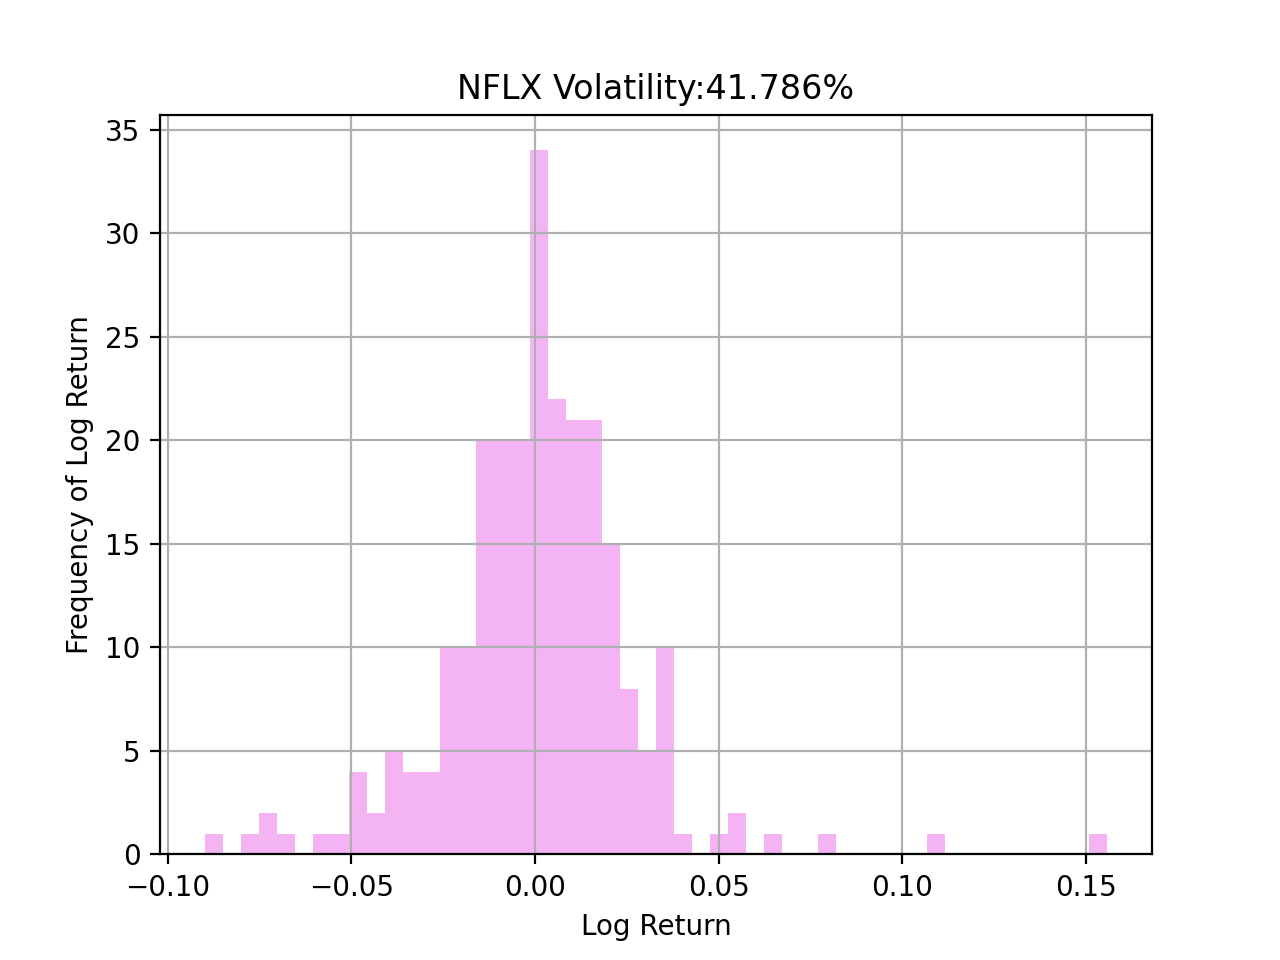

In [14]:
fig, ax = plt.subplots()
df["Log_Returns"].hist(ax=ax, bins=50, alpha=.60, color = "violet")
plt.xlabel("Log Return")
plt.ylabel("Frequency of Log Return")
plt.title("NFLX Volatility:" + str_vol + "%")
# save fig
# plt.savefig("NFLX_Volatility.png")

### Create 10 day rolling moving average

In [15]:
df["MA_10"] = df["Close"].rolling(10).mean()
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily_Change,Normalized_Change,Daily_Percent_Change,Log_Returns,MA_10
Date,,,,,,,,,,,
2021-05-17,485.59,492.71,482.81,488.94,488.94,2705200,3.35,1.18,-0.008979,-0.009020,493.837
2021-05-18,488.40,493.48,486.19,486.28,486.28,2350500,-2.12,1.17,-0.005440,-0.005455,492.147
2021-05-19,481.63,488.57,478.54,487.70,487.70,3349900,6.07,1.18,0.002920,0.002916,491.309
2021-05-20,489.55,502.70,488.98,501.67,501.67,3721200,12.12,1.21,0.028645,0.028242,491.521
2021-05-21,503.12,505.40,497.26,497.89,497.89,3317300,-5.23,1.20,-0.007535,-0.007563,490.926


### Create 10 day exponential moving average

In [16]:
df["EMA_10"] = df["Close"].ewm(span=10, adjust=False).mean()
df.tail(4)

,Open,High,Low,Close,Adj Close,Volume,Daily_Change,Normalized_Change,Daily_Percent_Change,Log_Returns,MA_10,EMA_10
Date,,,,,,,,,,,,
2021-05-18,488.40,493.48,486.19,486.28,486.28,2350500,-2.12,1.17,-0.005440,-0.005455,492.147,493.244166
2021-05-19,481.63,488.57,478.54,487.70,487.70,3349900,6.07,1.18,0.002920,0.002916,491.309,492.236135
2021-05-20,489.55,502.70,488.98,501.67,501.67,3721200,12.12,1.21,0.028645,0.028242,491.521,493.951384
2021-05-21,503.12,505.40,497.26,497.89,497.89,3317300,-5.23,1.20,-0.007535,-0.007563,490.926,494.667496


### Graph the EMA vs MA w/ Closing Price overlay

<IPython.core.display.Javascript object>


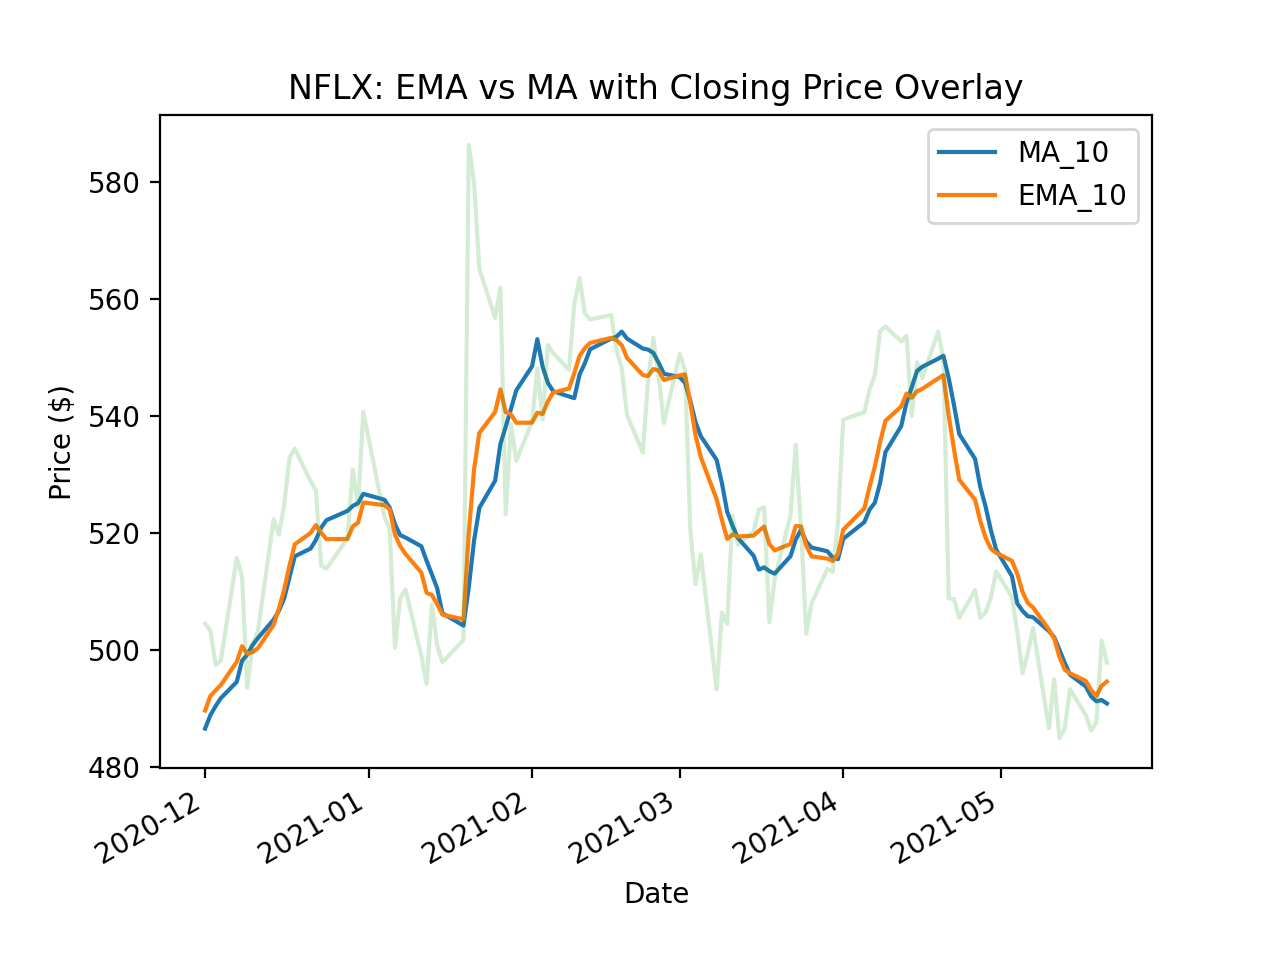

In [19]:
fig, ax = plt.subplots()
df[["MA_10", "EMA_10"]].loc["2020-12-01" :].plot(ax=ax)
df["Close"].loc["2020-12-01" :].plot(ax = ax, alpha =.20)
plt.ylabel("Price ($)")
plt.xlabel("Date")
plt.title("NFLX: EMA vs MA with Closing Price Overlay")
# save it
# plt.savefig("NFLX_EMA_MA.png")